# dependencies for kaggle directory setting

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!touch ~/.kaggle/kaggle.json
!cp kaggle.json ~/.kaggle/kaggle.json




# kaggle path

In [ ]:
!kaggle datasets download -d samuelcortinhas/sports-balls-multiclass-image-classification

Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/sports-balls-multiclass-image-classification
License(s): CC0-1.0
100% 400M/401M [00:07<00:00, 55.0MB/s]
100% 401M/401M [00:07<00:00, 56.2MB/s]


# unzip files

In [ ]:
import zipfile
with zipfile.ZipFile("sports-balls-multiclass-image-classification.zip", 'r') as zip_ref:
    zip_ref.extractall('/content')
    zip_ref.close()
    print("Done")


Done


# important libraries like(tensor,data manipulation,array coputing)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, BatchNormalization
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.optimizers import Adam


# Data generator using keras to load data

In [ ]:
# genrator using keras
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)
test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

Found 7328 files belonging to 15 classes.
Found 1841 files belonging to 15 classes.


# class names

In [ ]:
train_ds.class_names

['american_football',
 'baseball',
 'basketball',
 'billiard_ball',
 'bowling_ball',
 'cricket_ball',
 'football',
 'golf_ball',
 'hockey_ball',
 'hockey_puck',
 'rugby_ball',
 'shuttlecock',
 'table_tennis_ball',
 'tennis_ball',
 'volleyball']

# lenth of clases

In [ ]:
len(train_ds.class_names)

15

# image and label shape

In [ ]:
for image,label in train_ds.take(1):
  print(image.shape)
  print(label.shape)

(32, 128, 128, 3)
(32,)


# visulizing the data

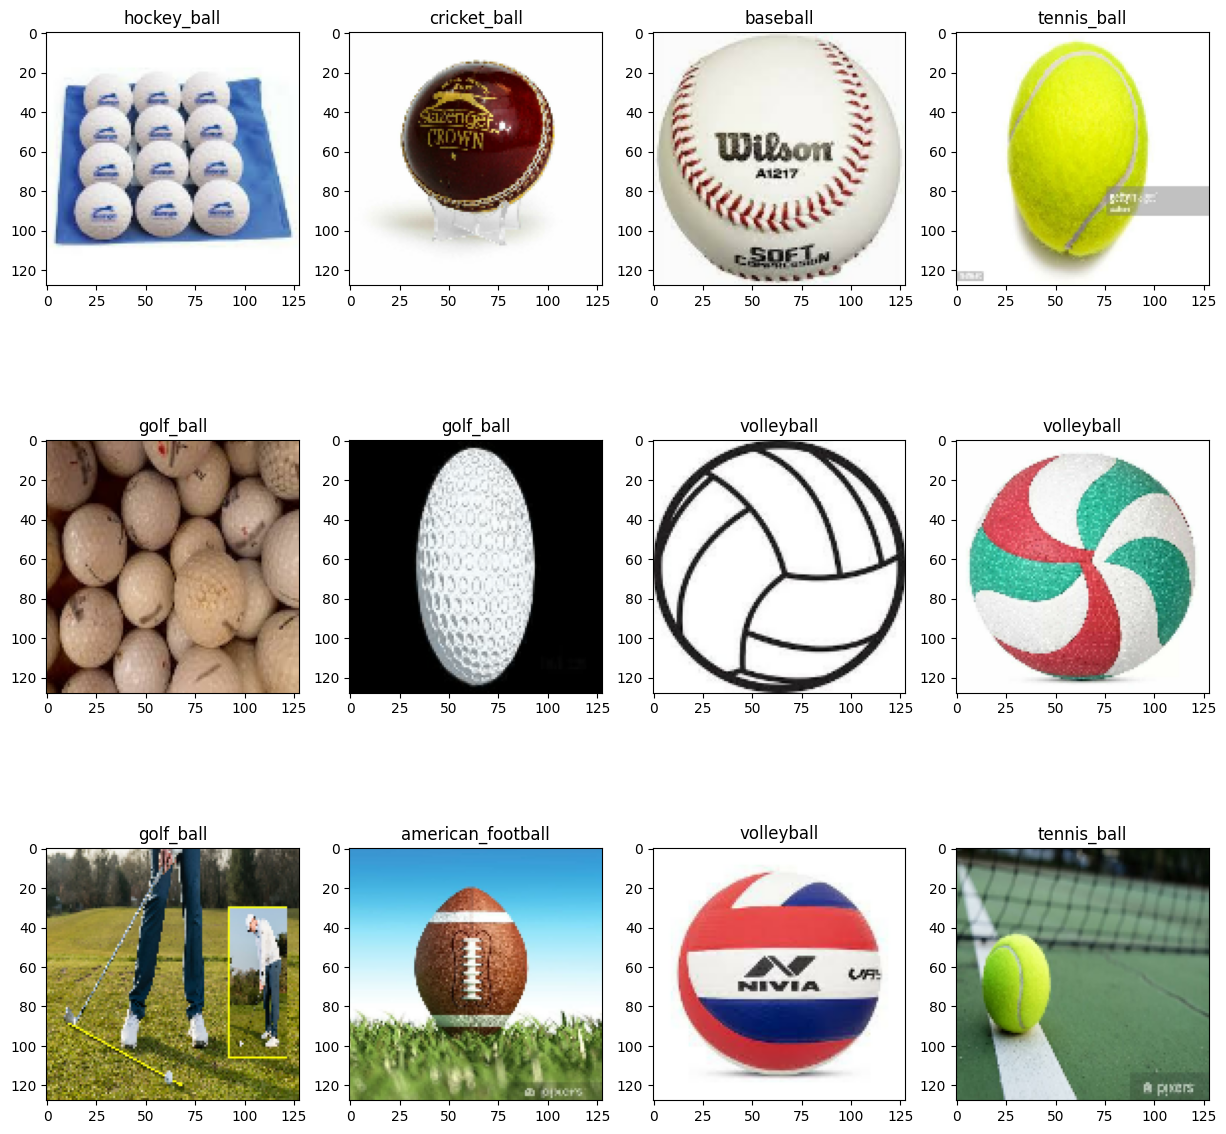

In [ ]:
plt.figure(figsize=(15,15))
for image,lable in train_ds.take(1):
  for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[lable[i]])


# normalize the images into 0,1 form

In [ ]:
#normalize our data
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
test_ds=test_ds.map(process)

# model building

In [ ]:
model=Sequential()

model.add(Conv2D(65,kernel_size=(3,3),padding='same',activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(160,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())



model.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model.add(BatchNormalization())

model.add(Dense(15,activation='softmax'))



In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 128, 128, 65)        │           1,820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 64, 64, 65)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 64, 64, 128)         │          75,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 32, 32, 160)         │         184,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 16, 16, 160)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 40960)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │       5,243,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,506,763 (21.01 MB)

 Trainable params: 5,506,507 (21.01 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:

model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
calbak=EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
history=model.fit(train_ds,epochs=40,validation_data=test_ds,callbacks=[calbak])

Epoch 1/40
229/229 ━━━━━━━━━━━━━━━━━━━━ 31s 109ms/step - accuracy: 0.1682 - loss: 4.8133 - val_accuracy: 0.2124 - val_loss: 3.0201
Epoch 2/40
229/229 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.2526 - loss: 2.6676 - val_accuracy: 0.1222 - val_loss: 6.2396
Epoch 3/40
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.3159 - loss: 2.4959 - val_accuracy: 0.2004 - val_loss: 3.2665
Epoch 4/40
229/229 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - accuracy: 0.3598 - loss: 2.4014 - val_accuracy: 0.3036 - val_loss: 2.4488
Epoch 5/40
229/229 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.3749 - loss: 2.3416 - val_accuracy: 0.3373 - val_loss: 2.5367
Epoch 6/40
229/229 ━━━━━━━━━━━━━━━━━━━━ 22s 84ms/step - accuracy: 0.4043 - loss: 2.2914 - val_accuracy: 0.3471 - val_loss: 2.5329
Epoch 7/40
229/229 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.4261 - loss: 2.2876 - val_accuracy: 0.3743 - val_loss: 2.4664
Epoch 8/40
229/229 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.4711 - loss: 2.1965 -

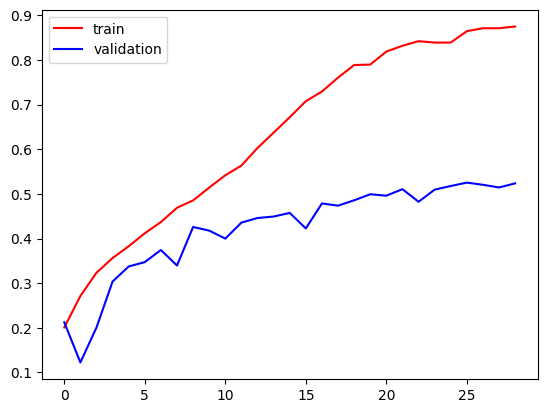

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

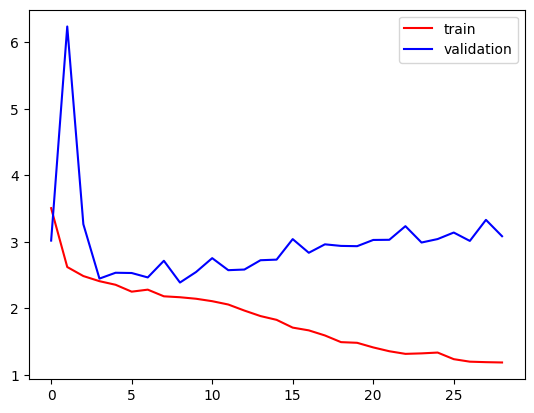

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()